In [1]:
import torch 
import torch.nn as nn 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# input and label 
x_train = np.array( [[3.3] , [4.4] , [5.5] ],dtype = np.float32)
y_train = np.array( [[1.7], [2.76], [2.09]],dtype = np.float32)

In [3]:
# 建立线性模型,初始化wight 和 bias的值
input_size , output_size = 1,1 
model = nn.Linear(input_size,output_size) 

In [4]:
model.weight , model.bias

(Parameter containing:
 tensor([[-0.4532]], requires_grad=True), Parameter containing:
 tensor([-0.5508], requires_grad=True))

In [5]:
# 设置学习率 ，损失函数 ，以及优化器 
learning_rate = 0.001  
criterion  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [6]:
num_epochs = 100  # 迭代一百次
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    optimizer.zero_grad() 
    # 反向传播求梯度 ，更新网络权重 
    loss.backward() 
    optimizer.step()
    
    # 输入状态
    if (epoch+1) %5 ==0:
        print('Epoch :{}/{},  Loss : {:.3}'.format(epoch+1,num_epochs,loss.item()))

Epoch :5/100,  Loss : 16.3
Epoch :10/100,  Loss : 10.7
Epoch :15/100,  Loss : 7.02
Epoch :20/100,  Loss : 4.66
Epoch :25/100,  Loss : 3.13
Epoch :30/100,  Loss : 2.13
Epoch :35/100,  Loss : 1.48
Epoch :40/100,  Loss : 1.06
Epoch :45/100,  Loss : 0.791
Epoch :50/100,  Loss : 0.613
Epoch :55/100,  Loss : 0.498
Epoch :60/100,  Loss : 0.424
Epoch :65/100,  Loss : 0.375
Epoch :70/100,  Loss : 0.344
Epoch :75/100,  Loss : 0.323
Epoch :80/100,  Loss : 0.31
Epoch :85/100,  Loss : 0.301
Epoch :90/100,  Loss : 0.295
Epoch :95/100,  Loss : 0.292
Epoch :100/100,  Loss : 0.289


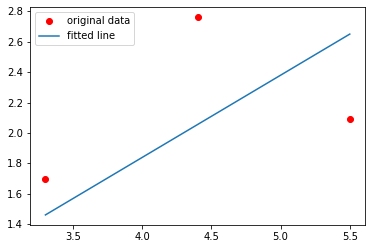

In [7]:
predicted = model(torch.from_numpy(x_train)).detach().numpy() 
plt.plot(x_train,y_train,'ro',label = 'original data') 
plt.plot(x_train,predicted,label = 'fitted line')
plt.legend()
plt.show()

In [38]:
torch.save(model.state_dict(),'LR.ckpt')